In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [5]:
df=pd.read_csv('netflix_titles.csv')

In [6]:
print(df.shape)

(8807, 12)


In [7]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [14]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [16]:
missing=df.isna().sum().sort_values(ascending=False)
print('Missing Values:\n', missing)

Missing Values:
 director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64


In [18]:
df['date_added']=df['date_added'].str.strip()

In [20]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [21]:
print(df['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]


In [22]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

In [24]:
df[['title','type','country','release_year','rating','duration','year_added']]

,title,type,country,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,Movie,United States,2020,PG-13,90 min,2021.0
1,Blood & Water,TV Show,South Africa,2021,TV-MA,2 Seasons,2021.0
2,Ganglands,TV Show,NaN,2021,TV-MA,1 Season,2021.0
3,Jailbirds New Orleans,TV Show,NaN,2021,TV-MA,1 Season,2021.0
4,Kota Factory,TV Show,India,2021,TV-MA,2 Seasons,2021.0
...,...,...,...,...,...,...,...
8802,Zodiac,Movie,United States,2007,R,158 min,2019.0
8803,Zombie Dumb,TV Show,NaN,2018,TV-Y7,2 Seasons,2019.0
8804,Zombieland,Movie,United States,2009,R,88 min,2019.0
8805,Zoom,Movie,United States,2006,PG,88 min,2020.0


In [25]:
print(missing.head(3))

director    2634
country      831
cast         825
dtype: int64


In [28]:
type_counts = df['type'].value_counts()

/var/folders/zx/j1wlvtbx6c5c4fc8gl9v8k200000gn/T/ipykernel_87002/4096549531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="dark")


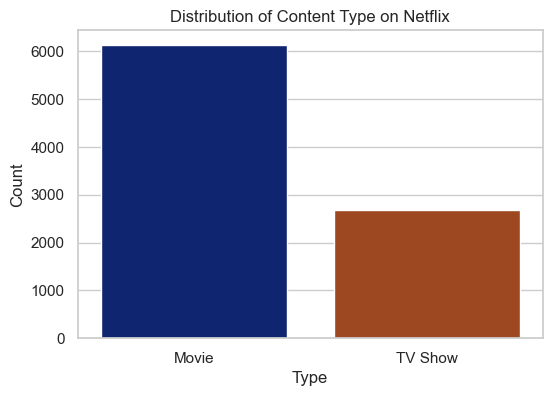

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="dark")
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [37]:
release_trend=df['release_year'].value_counts().sort_index()

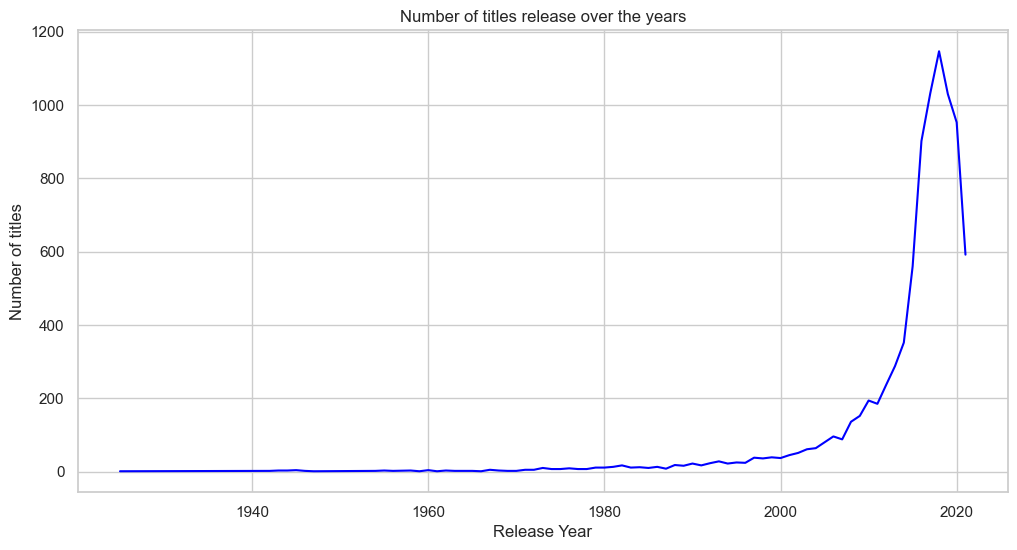

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(x=release_trend.index, y=release_trend.values, color='blue')
plt.title('Number of titles release over the years')
plt.xlabel('Release Year')
plt.ylabel('Number of titles')
plt.grid(True)
plt.show()

In [42]:
added_trend=df['year_added'].value_counts().sort_index()

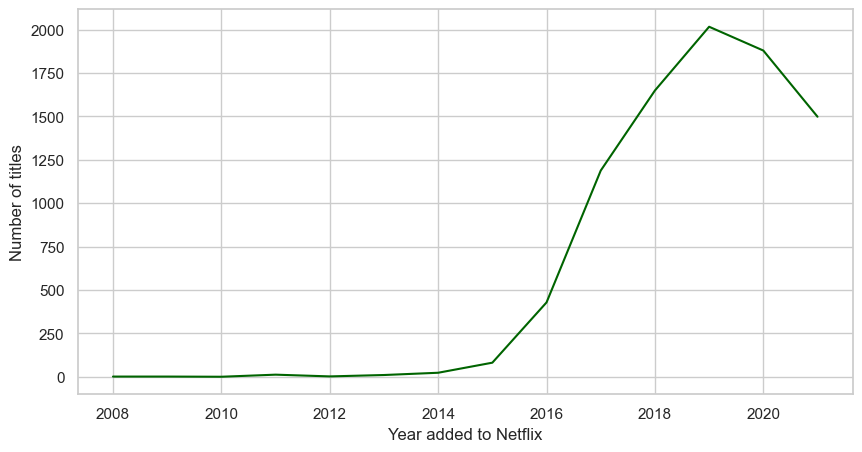

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(x=added_trend.index, y=added_trend.values, color='darkgreen')
plt.xlabel('Year added to Netflix')
plt.ylabel('Number of titles')
plt.grid(True)
plt.show()

In [52]:
country_data=df.dropna(subset=['country'])

In [54]:
top_countries=country_data['country'].value_counts().head(10)

/var/folders/zx/j1wlvtbx6c5c4fc8gl9v8k200000gn/T/ipykernel_87002/2392107769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index, palette='rocket')


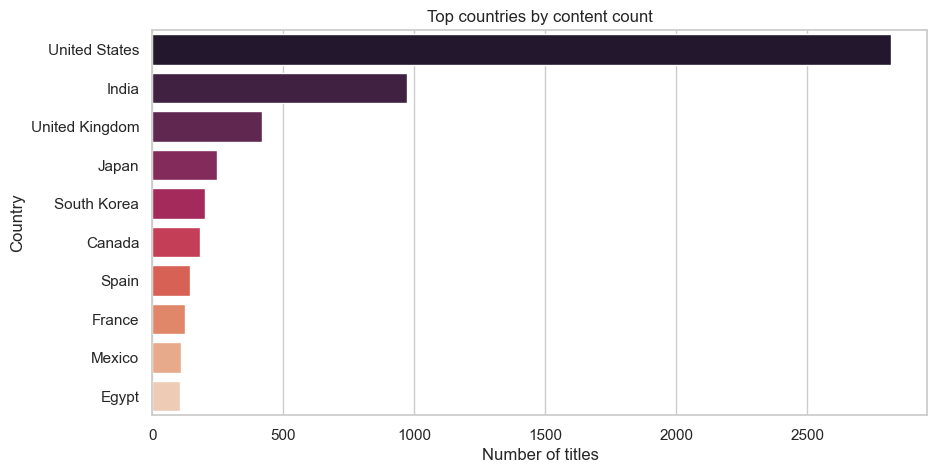

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values,y=top_countries.index, palette='rocket')
plt.title('Top countries by content count')
plt.xlabel('Number of titles')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.show()

In [68]:
from collections import Counter

In [69]:
genre_data = df.dropna(subset=['listed_in'])

In [70]:
all_genres = []
for genres in genre_data['listed_in']:
    for genre in genres.split(','):
        all_genres.append(genre.strip())

In [71]:
genre_counts = Counter(all_genres).most_common(10)

In [72]:
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

/var/folders/zx/j1wlvtbx6c5c4fc8gl9v8k200000gn/T/ipykernel_87002/2504940323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='dark')


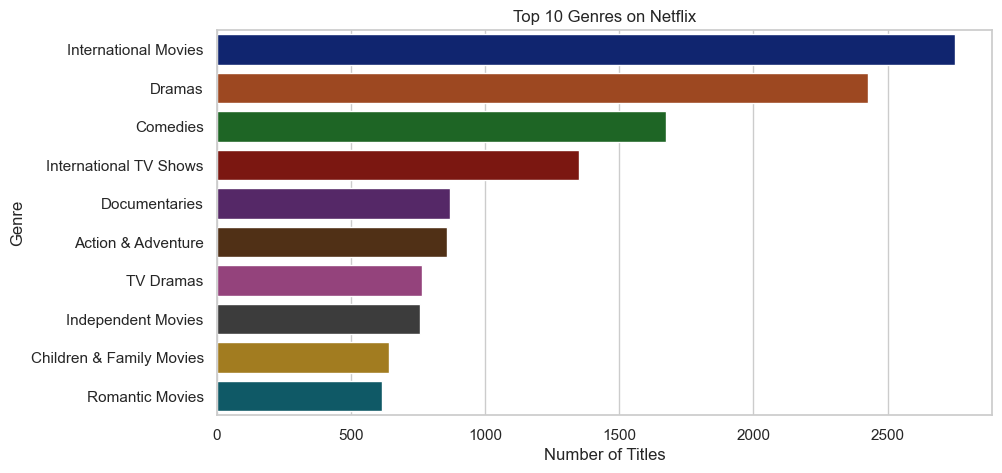

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='dark')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.grid(True, axis='x')
plt.show()

In [75]:
movies = df[df['type'] == 'Movie'].copy()

In [76]:
movies['duration_clean'] = movies['duration'].str.replace(' min', '').astype(float)

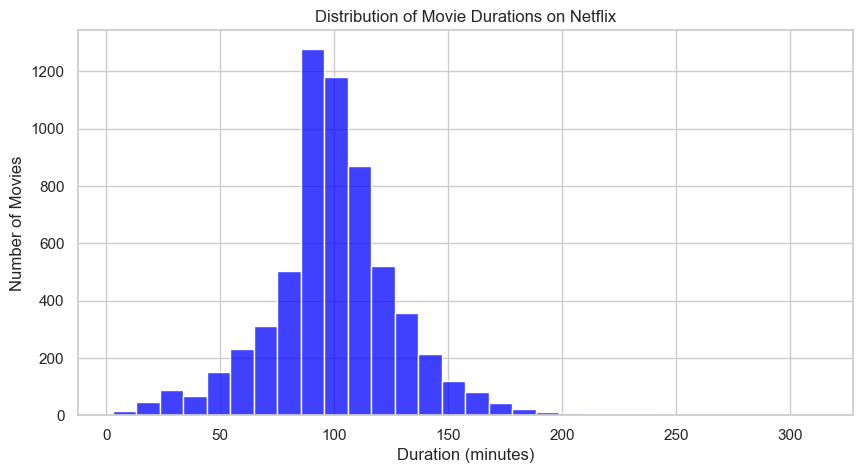

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(movies['duration_clean'], bins=30, color='blue')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

In [79]:
tv_shows = df[df['type'] == 'TV Show'].copy()

In [80]:
tv_shows['season_count'] = tv_shows['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)

/var/folders/zx/j1wlvtbx6c5c4fc8gl9v8k200000gn/T/ipykernel_87002/2169570659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season_count', data=tv_shows, palette='Set2')


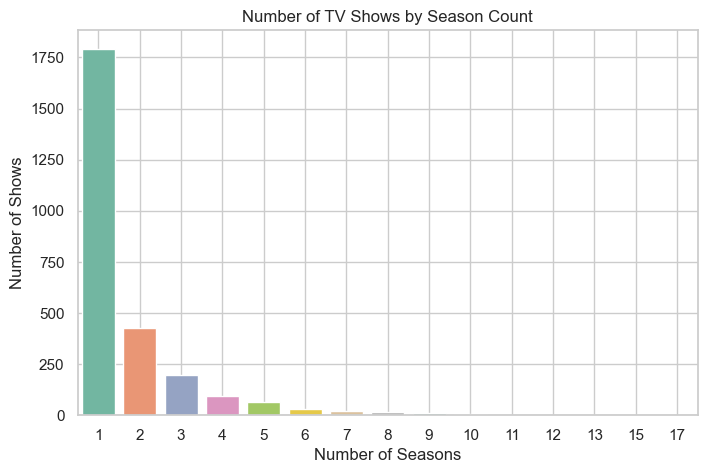

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(x='season_count', data=tv_shows, palette='Set2')
plt.title("Number of TV Shows by Season Count")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.show()